In [2]:
from matplotlib.colors import ListedColormap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'grey', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y==cl, 1],
                    alpha = 0.8,
                    color = colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolors='black')

    if test_idx:
        X_test, y_test = X[test_idx], y[test_idx]
        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha=1,
                    linewidths=1,
                    marker='o',
                    c='',
                    s=100,
                    label='test set',
                    edgecolors='black')

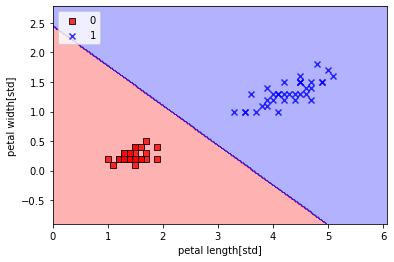

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test) # w

X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

from LogisticRegressionGD import  LogisticRegressionGD
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length[std]')
plt.ylabel("petal width[std]")
plt.legend(loc='upper left')
plt.show()

<ipython-input-2-aefef2415471>:32: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0],


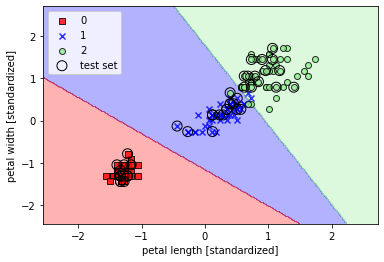

In [14]:
from sklearn.linear_model import LogisticRegression

X_combined_std = np.vstack([X_train_std, X_test_std])
y_combined = np.hstack([y_train, y_test])

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel("petal width [standardized]")
plt.legend(loc="upper left")
plt.show()

In [10]:
print(lr.predict_proba(X_test_std[:3, :]))
print(lr.predict_proba(X_test_std[:3, :]).argmax(1))

[[1.52213484e-12 3.85303417e-04 9.99614697e-01]
 [9.93560717e-01 6.43928295e-03 1.14112016e-15]
 [9.98655228e-01 1.34477208e-03 1.76178271e-17]]
[2 0 0]
